In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import requests
import math
import pickle
import sys
import spotipy
from time import sleep

In [2]:
featsfinal = pd.read_csv('featsfinal.csv')

In [3]:
featsfinal

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,Hot
0,0.761,0.525,11,-6.900,1,0.0944,0.44000,0.000007,0.0921,0.531,80.870,audio_features,3USxtqRwSYz57Ewm6wWRMp,spotify:track:3USxtqRwSYz57Ewm6wWRMp,https://api.spotify.com/v1/tracks/3USxtqRwSYz5...,https://api.spotify.com/v1/audio-analysis/3USx...,238805,4,True
1,0.825,0.414,2,-6.634,1,0.1440,0.00265,0.000000,0.3570,0.106,72.993,audio_features,4A8cWXxKfIL3lAyUDzXbCF,spotify:track:4A8cWXxKfIL3lAyUDzXbCF,https://api.spotify.com/v1/tracks/4A8cWXxKfIL3...,https://api.spotify.com/v1/audio-analysis/4A8c...,200548,4,True
2,0.695,0.540,4,-5.692,1,0.0493,0.29900,0.000000,0.3670,0.415,121.932,audio_features,4fouWK6XVHhzl78KzQ1UjL,spotify:track:4fouWK6XVHhzl78KzQ1UjL,https://api.spotify.com/v1/tracks/4fouWK6XVHhz...,https://api.spotify.com/v1/audio-analysis/4fou...,168602,4,True
3,0.591,0.764,1,-5.484,1,0.0483,0.03830,0.000000,0.1030,0.478,169.928,audio_features,5HCyWlXZPP0y6Gqq8TgA20,spotify:track:5HCyWlXZPP0y6Gqq8TgA20,https://api.spotify.com/v1/tracks/5HCyWlXZPP0y...,https://api.spotify.com/v1/audio-analysis/5HCy...,141806,4,True
4,0.604,0.366,5,-7.519,1,0.0282,0.57800,0.000000,0.1330,0.130,141.981,audio_features,0gplL1WMoJ6iYaPgMCL0gX,spotify:track:0gplL1WMoJ6iYaPgMCL0gX,https://api.spotify.com/v1/tracks/0gplL1WMoJ6i...,https://api.spotify.com/v1/audio-analysis/0gpl...,224695,4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4288,0.726,0.769,6,-5.043,1,0.1230,0.02930,0.010100,0.1040,0.733,97.985,audio_features,3B54sVLJ402zGa6Xm4YGNe,spotify:track:3B54sVLJ402zGa6Xm4YGNe,https://api.spotify.com/v1/tracks/3B54sVLJ402z...,https://api.spotify.com/v1/audio-analysis/3B54...,233902,4,False
4289,0.578,0.574,2,-6.209,1,0.0454,0.19600,0.000000,0.0830,0.301,174.152,audio_features,0kN8xEmgMW9mh7UmDYHlJP,spotify:track:0kN8xEmgMW9mh7UmDYHlJP,https://api.spotify.com/v1/tracks/0kN8xEmgMW9m...,https://api.spotify.com/v1/audio-analysis/0kN8...,261240,4,False
4290,0.732,0.750,11,-6.366,0,0.2310,0.00264,0.000000,0.1090,0.401,155.096,audio_features,7GX5flRQZVHRAGd6B4TmDO,spotify:track:7GX5flRQZVHRAGd6B4TmDO,https://api.spotify.com/v1/tracks/7GX5flRQZVHR...,https://api.spotify.com/v1/audio-analysis/7GX5...,182707,4,False
4291,0.645,0.797,4,-5.943,0,0.1320,0.03630,0.000000,0.2470,0.367,129.956,audio_features,7gUux50RnQ0SC0lXIZuod3,spotify:track:7gUux50RnQ0SC0lXIZuod3,https://api.spotify.com/v1/tracks/7gUux50RnQ0S...,https://api.spotify.com/v1/audio-analysis/7gUu...,351240,4,False


In [4]:
featsfinal['type']

0       audio_features
1       audio_features
2       audio_features
3       audio_features
4       audio_features
             ...      
4288    audio_features
4289    audio_features
4290    audio_features
4291    audio_features
4292    audio_features
Name: type, Length: 4293, dtype: object

**1.** Before we start with the kmeansclustering, lets start cleaning this dataset for columns that will be relevant to the model. We can get rid of : **type,	id,	uri, track_href, analysis_url, time_signature (as there are two columns based on time)** and I also dropped **Hot** column.

In [5]:
featsfinal_new = featsfinal.drop(['type','id', 'uri', 'track_href', 'analysis_url','time_signature','Hot'], axis = 1)

In [8]:
featsfinal_new

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.761,0.525,11,-6.900,1,0.0944,0.44000,0.000007,0.0921,0.531,80.870,238805
1,0.825,0.414,2,-6.634,1,0.1440,0.00265,0.000000,0.3570,0.106,72.993,200548
2,0.695,0.540,4,-5.692,1,0.0493,0.29900,0.000000,0.3670,0.415,121.932,168602
3,0.591,0.764,1,-5.484,1,0.0483,0.03830,0.000000,0.1030,0.478,169.928,141806
4,0.604,0.366,5,-7.519,1,0.0282,0.57800,0.000000,0.1330,0.130,141.981,224695
...,...,...,...,...,...,...,...,...,...,...,...,...
4288,0.726,0.769,6,-5.043,1,0.1230,0.02930,0.010100,0.1040,0.733,97.985,233902
4289,0.578,0.574,2,-6.209,1,0.0454,0.19600,0.000000,0.0830,0.301,174.152,261240
4290,0.732,0.750,11,-6.366,0,0.2310,0.00264,0.000000,0.1090,0.401,155.096,182707
4291,0.645,0.797,4,-5.943,0,0.1320,0.03630,0.000000,0.2470,0.367,129.956,351240


**2.** Now time for the **transformations**. Here we will use **standard scaler**

In [9]:
scaler = StandardScaler()
scaler.fit(featsfinal_new)
X_scaled = scaler.transform(featsfinal_new)
X_scaled_df = pd.DataFrame(X_scaled, columns = featsfinal_new.columns)
display(featsfinal_new.head())
print()
display(X_scaled_df.head())

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.761,0.525,11,-6.900,1,0.0944,0.44000,0.000007,0.0921,0.531,80.870,238805
1,0.825,0.414,2,-6.634,1,0.1440,0.00265,0.000000,0.3570,0.106,72.993,200548
2,0.695,0.540,4,-5.692,1,0.0493,0.29900,0.000000,0.3670,0.415,121.932,168602
3,0.591,0.764,1,-5.484,1,0.0483,0.03830,0.000000,0.1030,0.478,169.928,141806
4,0.604,0.366,5,-7.519,1,0.0282,0.57800,0.000000,0.1330,0.130,141.981,224695


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,1.172511,-0.037989,1.627830,0.578197,0.698231,0.029364,0.112978,-0.607023,-0.601368,0.297372,-1.200487,0.029358
1,1.501499,-0.430200,-0.902523,0.617057,0.698231,0.460580,-1.062609,-0.607042,0.923904,-1.285870,-1.454080,-0.299503
2,0.833242,0.015012,-0.340223,0.754672,0.698231,-0.362730,-0.266027,-0.607042,0.981483,-0.134760,0.121470,-0.574114
3,0.298637,0.806502,-1.183674,0.785058,0.698231,-0.371424,-0.966783,-0.607042,-0.538607,0.099932,1.666662,-0.804455
4,0.365463,-0.599805,-0.059072,0.487769,0.698231,-0.546171,0.483919,-0.607042,-0.365869,-1.196464,0.766931,-0.091933


In [10]:
#Save the scaler
filename = "standard_scaler.pickle" # Path with filename
with open(filename, "wb") as file:
        pickle.dump(scaler,file)

**3.** Time for **K Means Clustering**

Training a K-Means model with 5 neighbours! 

Training a K-Means model with 6 neighbours! 

Training a K-Means model with 7 neighbours! 

Training a K-Means model with 8 neighbours! 

Training a K-Means model with 9 neighbours! 

Training a K-Means model with 10 neighbours! 

Training a K-Means model with 11 neighbours! 

Training a K-Means model with 12 neighbours! 

Training a K-Means model with 13 neighbours! 

Training a K-Means model with 14 neighbours! 

Training a K-Means model with 15 neighbours! 

Training a K-Means model with 16 neighbours! 

Training a K-Means model with 17 neighbours! 

Training a K-Means model with 18 neighbours! 

Training a K-Means model with 19 neighbours! 

Training a K-Means model with 20 neighbours! 

Training a K-Means model with 21 neighbours! 

Training a K-Means model with 22 neighbours! 

Training a K-Means model with 23 neighbours! 

Training a K-Means model with 24 neighbours! 

Training a K-Means model with 25 neighbours! 

Training a K-Means

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

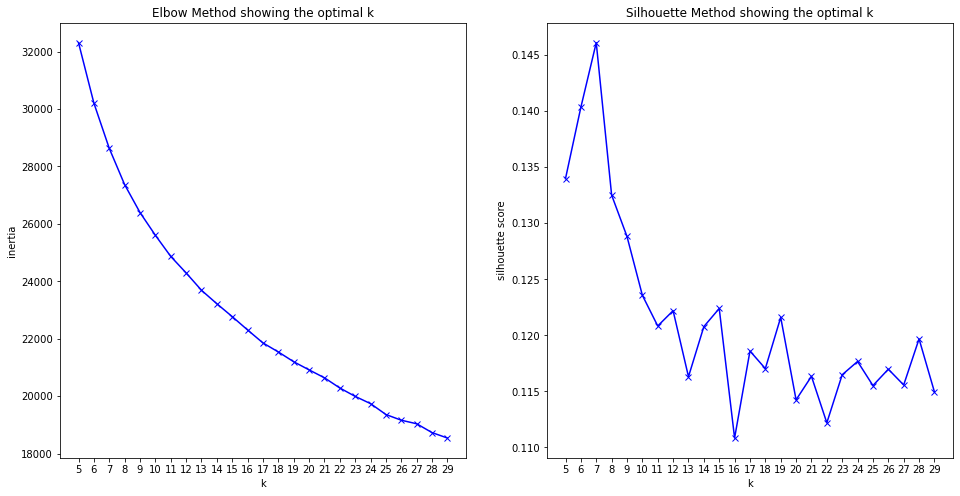

In [11]:
K = range(5, 30)
inertia = []
silhouette = []

for k in K:
    print("Training a K-Means model with {} neighbours! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,init = "k-means++",
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    filename = "kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].plot(K, inertia, 'bx-')
ax[0].set_xlabel('k')
ax[0].set_ylabel('inertia')
ax[0].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[0].set_title('Elbow Method showing the optimal k')
ax[1].plot(K, silhouette, 'bx-')
ax[1].set_xlabel('k')
ax[1].set_ylabel('silhouette score')
ax[1].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[1].set_title('Silhouette Method showing the optimal k')

The Elbow method had no clear elbow, therefore I will go based on the Silhouette Method. I can see peaks **7, 12, 15, 17, 19, 28**, so would be good to use either of those models when making the recommendations

**4.** Add the **clusters** information to your original df

In [12]:
#Lets first load the model that we want
#For now, I will use k=15 as by the Silhouette Method that looks good

def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as file: 
            return pickle.load(file) 
    except FileNotFoundError: 
        print("File not found!") 

best_model = load("kmeans_15.pickle")



In [13]:
#Here we have the clusters for each song
cluster = best_model.predict(X_scaled_df)

In [14]:
#We turn it into a dataframe
cluster_df = pd.DataFrame(cluster, columns=['cluster'])

In [15]:
cluster_df['cluster'].value_counts()

5     501
1     448
2     447
10    401
9     370
12    343
0     315
11    275
8     235
4     232
14    227
3     180
7     172
6     109
13     38
Name: cluster, dtype: int64

In [16]:
#We can now combine the cluster df with our original df to display which cluster each song belongs to
featsfinal = pd.concat([featsfinal, cluster_df], axis = 1)
#featsfinal now has the cluster column added

In [17]:
#Checkin the clusters in my hot 100
featsfinal[['cluster']][featsfinal['Hot']==True].value_counts()

cluster
5          23
2          19
11         17
0          14
10         10
12          5
1           4
3           2
9           2
4           1
dtype: int64

In [18]:
featsfinal[featsfinal['Hot']==True]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,Hot,cluster
0,0.761,0.525,11,-6.900,1,0.0944,0.44000,0.000007,0.0921,0.531,80.870,audio_features,3USxtqRwSYz57Ewm6wWRMp,spotify:track:3USxtqRwSYz57Ewm6wWRMp,https://api.spotify.com/v1/tracks/3USxtqRwSYz5...,https://api.spotify.com/v1/audio-analysis/3USx...,238805,4,True,10
1,0.825,0.414,2,-6.634,1,0.1440,0.00265,0.000000,0.3570,0.106,72.993,audio_features,4A8cWXxKfIL3lAyUDzXbCF,spotify:track:4A8cWXxKfIL3lAyUDzXbCF,https://api.spotify.com/v1/tracks/4A8cWXxKfIL3...,https://api.spotify.com/v1/audio-analysis/4A8c...,200548,4,True,5
2,0.695,0.540,4,-5.692,1,0.0493,0.29900,0.000000,0.3670,0.415,121.932,audio_features,4fouWK6XVHhzl78KzQ1UjL,spotify:track:4fouWK6XVHhzl78KzQ1UjL,https://api.spotify.com/v1/tracks/4fouWK6XVHhz...,https://api.spotify.com/v1/audio-analysis/4fou...,168602,4,True,5
3,0.591,0.764,1,-5.484,1,0.0483,0.03830,0.000000,0.1030,0.478,169.928,audio_features,5HCyWlXZPP0y6Gqq8TgA20,spotify:track:5HCyWlXZPP0y6Gqq8TgA20,https://api.spotify.com/v1/tracks/5HCyWlXZPP0y...,https://api.spotify.com/v1/audio-analysis/5HCy...,141806,4,True,0
4,0.604,0.366,5,-7.519,1,0.0282,0.57800,0.000000,0.1330,0.130,141.981,audio_features,0gplL1WMoJ6iYaPgMCL0gX,spotify:track:0gplL1WMoJ6iYaPgMCL0gX,https://api.spotify.com/v1/tracks/0gplL1WMoJ6i...,https://api.spotify.com/v1/audio-analysis/0gpl...,224695,4,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,0.587,0.614,2,-6.344,1,0.0435,0.03060,0.000000,0.3990,0.451,160.075,audio_features,1kBMIYqe0ILRUJZ7K2PV0k,spotify:track:1kBMIYqe0ILRUJZ7K2PV0k,https://api.spotify.com/v1/tracks/1kBMIYqe0ILR...,https://api.spotify.com/v1/audio-analysis/1kBM...,227527,4,True,0
93,0.854,0.806,11,-8.262,0,0.0886,0.02090,0.054200,0.0703,0.637,124.927,audio_features,20on25jryn53hWghthWWW3,spotify:track:20on25jryn53hWghthWWW3,https://api.spotify.com/v1/tracks/20on25jryn53...,https://api.spotify.com/v1/audio-analysis/20on...,157890,4,True,2
94,0.877,0.599,1,-7.901,1,0.2980,0.04470,0.000000,0.1100,0.305,149.989,audio_features,3gG6t4xCPtnTskhpRFFsqO,spotify:track:3gG6t4xCPtnTskhpRFFsqO,https://api.spotify.com/v1/tracks/3gG6t4xCPtnT...,https://api.spotify.com/v1/audio-analysis/3gG6...,115320,4,True,11
95,0.941,0.514,1,-6.778,1,0.3290,0.15300,0.000002,0.1040,0.573,126.046,audio_features,41jxlPqpPqiky977DkJrpY,spotify:track:41jxlPqpPqiky977DkJrpY,https://api.spotify.com/v1/tracks/41jxlPqpPqik...,https://api.spotify.com/v1/audio-analysis/41jx...,185213,4,True,11


In [19]:
featsfinal[featsfinal['Hot']==False]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,Hot,cluster
97,0.282,0.687,7,-13.294,1,0.0500,0.000564,0.8330,0.1290,0.291,164.794,audio_features,7wwmubHFYqOGUBupb32BqL,spotify:track:7wwmubHFYqOGUBupb32BqL,https://api.spotify.com/v1/tracks/7wwmubHFYqOG...,https://api.spotify.com/v1/audio-analysis/7wwm...,126547,4,False,9
98,0.244,0.828,11,-6.714,1,0.0752,0.000144,0.8510,0.1630,0.515,107.293,audio_features,5d2ADtt2FJCwqvM21KY4pR,spotify:track:5d2ADtt2FJCwqvM21KY4pR,https://api.spotify.com/v1/tracks/5d2ADtt2FJCw...,https://api.spotify.com/v1/audio-analysis/5d2A...,230987,4,False,9
99,0.715,0.780,2,-6.688,1,0.0327,0.010900,0.0017,0.1190,0.838,115.897,audio_features,5NLUcVnVHfnkt4uUexWdIH,spotify:track:5NLUcVnVHfnkt4uUexWdIH,https://api.spotify.com/v1/tracks/5NLUcVnVHfnk...,https://api.spotify.com/v1/audio-analysis/5NLU...,246600,4,False,5
100,0.419,0.152,0,-12.126,1,0.0277,0.326000,0.0034,0.1130,0.239,80.608,audio_features,01SfTM5nfCou5gQL70r6gs,spotify:track:01SfTM5nfCou5gQL70r6gs,https://api.spotify.com/v1/tracks/01SfTM5nfCou...,https://api.spotify.com/v1/audio-analysis/01Sf...,91760,4,False,1
101,0.860,0.368,7,-11.964,1,0.0637,0.890000,0.0484,0.0625,0.940,117.356,audio_features,5zS3m7o4vo7ppWbc5sMjyS,spotify:track:5zS3m7o4vo7ppWbc5sMjyS,https://api.spotify.com/v1/tracks/5zS3m7o4vo7p...,https://api.spotify.com/v1/audio-analysis/5zS3...,171107,4,False,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4288,0.726,0.769,6,-5.043,1,0.1230,0.029300,0.0101,0.1040,0.733,97.985,audio_features,3B54sVLJ402zGa6Xm4YGNe,spotify:track:3B54sVLJ402zGa6Xm4YGNe,https://api.spotify.com/v1/tracks/3B54sVLJ402z...,https://api.spotify.com/v1/audio-analysis/3B54...,233902,4,False,10
4289,0.578,0.574,2,-6.209,1,0.0454,0.196000,0.0000,0.0830,0.301,174.152,audio_features,0kN8xEmgMW9mh7UmDYHlJP,spotify:track:0kN8xEmgMW9mh7UmDYHlJP,https://api.spotify.com/v1/tracks/0kN8xEmgMW9m...,https://api.spotify.com/v1/audio-analysis/0kN8...,261240,4,False,0
4290,0.732,0.750,11,-6.366,0,0.2310,0.002640,0.0000,0.1090,0.401,155.096,audio_features,7GX5flRQZVHRAGd6B4TmDO,spotify:track:7GX5flRQZVHRAGd6B4TmDO,https://api.spotify.com/v1/tracks/7GX5flRQZVHR...,https://api.spotify.com/v1/audio-analysis/7GX5...,182707,4,False,2
4291,0.645,0.797,4,-5.943,0,0.1320,0.036300,0.0000,0.2470,0.367,129.956,audio_features,7gUux50RnQ0SC0lXIZuod3,spotify:track:7gUux50RnQ0SC0lXIZuod3,https://api.spotify.com/v1/tracks/7gUux50RnQ0S...,https://api.spotify.com/v1/audio-analysis/7gUu...,351240,4,False,12


In [20]:
featsfinal

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,Hot,cluster
0,0.761,0.525,11,-6.900,1,0.0944,0.44000,0.000007,0.0921,0.531,80.870,audio_features,3USxtqRwSYz57Ewm6wWRMp,spotify:track:3USxtqRwSYz57Ewm6wWRMp,https://api.spotify.com/v1/tracks/3USxtqRwSYz5...,https://api.spotify.com/v1/audio-analysis/3USx...,238805,4,True,10
1,0.825,0.414,2,-6.634,1,0.1440,0.00265,0.000000,0.3570,0.106,72.993,audio_features,4A8cWXxKfIL3lAyUDzXbCF,spotify:track:4A8cWXxKfIL3lAyUDzXbCF,https://api.spotify.com/v1/tracks/4A8cWXxKfIL3...,https://api.spotify.com/v1/audio-analysis/4A8c...,200548,4,True,5
2,0.695,0.540,4,-5.692,1,0.0493,0.29900,0.000000,0.3670,0.415,121.932,audio_features,4fouWK6XVHhzl78KzQ1UjL,spotify:track:4fouWK6XVHhzl78KzQ1UjL,https://api.spotify.com/v1/tracks/4fouWK6XVHhz...,https://api.spotify.com/v1/audio-analysis/4fou...,168602,4,True,5
3,0.591,0.764,1,-5.484,1,0.0483,0.03830,0.000000,0.1030,0.478,169.928,audio_features,5HCyWlXZPP0y6Gqq8TgA20,spotify:track:5HCyWlXZPP0y6Gqq8TgA20,https://api.spotify.com/v1/tracks/5HCyWlXZPP0y...,https://api.spotify.com/v1/audio-analysis/5HCy...,141806,4,True,0
4,0.604,0.366,5,-7.519,1,0.0282,0.57800,0.000000,0.1330,0.130,141.981,audio_features,0gplL1WMoJ6iYaPgMCL0gX,spotify:track:0gplL1WMoJ6iYaPgMCL0gX,https://api.spotify.com/v1/tracks/0gplL1WMoJ6i...,https://api.spotify.com/v1/audio-analysis/0gpl...,224695,4,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4288,0.726,0.769,6,-5.043,1,0.1230,0.02930,0.010100,0.1040,0.733,97.985,audio_features,3B54sVLJ402zGa6Xm4YGNe,spotify:track:3B54sVLJ402zGa6Xm4YGNe,https://api.spotify.com/v1/tracks/3B54sVLJ402z...,https://api.spotify.com/v1/audio-analysis/3B54...,233902,4,False,10
4289,0.578,0.574,2,-6.209,1,0.0454,0.19600,0.000000,0.0830,0.301,174.152,audio_features,0kN8xEmgMW9mh7UmDYHlJP,spotify:track:0kN8xEmgMW9mh7UmDYHlJP,https://api.spotify.com/v1/tracks/0kN8xEmgMW9m...,https://api.spotify.com/v1/audio-analysis/0kN8...,261240,4,False,0
4290,0.732,0.750,11,-6.366,0,0.2310,0.00264,0.000000,0.1090,0.401,155.096,audio_features,7GX5flRQZVHRAGd6B4TmDO,spotify:track:7GX5flRQZVHRAGd6B4TmDO,https://api.spotify.com/v1/tracks/7GX5flRQZVHR...,https://api.spotify.com/v1/audio-analysis/7GX5...,182707,4,False,2
4291,0.645,0.797,4,-5.943,0,0.1320,0.03630,0.000000,0.2470,0.367,129.956,audio_features,7gUux50RnQ0SC0lXIZuod3,spotify:track:7gUux50RnQ0SC0lXIZuod3,https://api.spotify.com/v1/tracks/7gUux50RnQ0S...,https://api.spotify.com/v1/audio-analysis/7gUu...,351240,4,False,12


In [21]:
#SAVE THE UPDATED FEATS FINAL WITH CLUSTERS AS CSV 
featsfinal.to_csv('feats_final_withclusters.csv', index = False)


**5.** **Get recommendations for a new song**
**BUILD A FINAL FUNCTION**

In [22]:
import sys
sys.path.insert(1, 'C:/Users/ALP/ironhack_2022/Unit_06/Day_02/lab_apis/config.py')
from config import *
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials

#Initialize SpotiPy with user credentias
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= client_id,
                                                           client_secret= client_secret_id))


#First I make smaller parts before I go on to make the final function

**A.** First lets get the **song features**

In [ ]:
def search_song():
    '''
    Assuming that we have all the libraries imported, this function prompts the user for the song name, 
    after which it provide a list of 10 possible songs. Then the user has to pick the number of the song that they
    want. And based on this it will return the href, track_id, and uri of that song.
    '''

    print('Enter song name:')
    x = input() #Input asking for song name
    
    results = sp.search(q=x,limit=10)
    i=0
    for item in results['tracks']['items']:#for loop that displays song name, the artist and url 
        print(i,".The name of song is: '{}' by '{}' and the url is: {}".format(item['name'],item['artists'][0]['name'], item['external_urls']['spotify']))
        i+=1
    print('Enter song number:')
    a = input()#input which asks for the number of the song(ordered number)
    a= int(a)
    href = results['tracks']['items'][a]['href']
    track_id = results['tracks']['items'][a]['id']
    uri = results['tracks']['items'][a]['uri']
    return href, track_id, uri

In [7]:
# This code will prompt the user for the song, and return the features of the selected song
def search_song():
    '''
    Assuming that we have all the libraries imported, this function prompts the user for the song name, 
    after which it provide a list of 10 possible songs. Then the user has to pick the number of the song that they
    want. And based on this it will return the features of that song.
    '''

    print('Enter song name:')
    x = input() #Input asking for song name
    
    results = sp.search(q=x,limit=10)
    i=0
    for item in results['tracks']['items']:#for loop that displays song name, the artist and url 
        print(i,".The name of song is: '{}' by '{}' and the url is: {}".format(item['name'],item['artists'][0]['name'], item['external_urls']['spotify']))
        i+=1
    print('Enter song number:')
    a = input()#input which asks for the number of the song(ordered number)
    a= int(a)

    my_dict = sp.audio_features(results["tracks"]["items"][a]["uri"])[0]
    my_dict_new = { key: [my_dict[key]] for key in list(my_dict.keys()) }
    my_dict_new['name'] = [results["tracks"]["items"][a]['name']]
    my_dict_new['artist'] = [results['tracks']['items'][a]['artists'][0]['name']]
    song_features = pd.DataFrame(my_dict_new)
    return song_features

In [85]:
song_features = search_song()

Enter song name:
Unforgettable
0 .The name of song is: 'Unforgettable' by 'French Montana' and the url is: https://open.spotify.com/track/3B54sVLJ402zGa6Xm4YGNe
1 .The name of song is: 'Unforgettable' by 'French Montana' and the url is: https://open.spotify.com/track/1hpFAn1a2Gq7yKTXKmd4JQ
2 .The name of song is: 'Unforgettable' by 'Thomas Rhett' and the url is: https://open.spotify.com/track/30MM5jWpUmOxtTNd9Ey5LZ
3 .The name of song is: 'Unforgettable - Major Lazer Remix' by 'French Montana' and the url is: https://open.spotify.com/track/5E0Ymk9G97mNrE8GDDOWOM
4 .The name of song is: 'Unforgettable' by 'Nat King Cole' and the url is: https://open.spotify.com/track/648TTtYB0bH0P8Hfy0FmkL
5 .The name of song is: 'Unforgettable' by 'Natalie Cole' and the url is: https://open.spotify.com/track/2MVQbDuhVs2muWFURtIdNb
6 .The name of song is: 'Unforgettable' by 'French Montana' and the url is: https://open.spotify.com/track/4KEPdMCp6YHrG57dHq0Miy
7 .The name of song is: 'Unforgettable' by '

**B.** Time for Clustering

In [86]:
#lets work from here now
song_features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,name,artist
0,0.546,0.87,4,-5.107,0,0.114,0.103,0,0.111,0.071,156.145,audio_features,5LZ0ZCRXrklIpnzn4Tcyde,spotify:track:5LZ0ZCRXrklIpnzn4Tcyde,https://api.spotify.com/v1/tracks/5LZ0ZCRXrklI...,https://api.spotify.com/v1/audio-analysis/5LZ0...,213813,4,Unforgettable,Drake


In [87]:
#Now time to do the clustering

#First drop unnecssary columns
song_features_new = song_features.drop(['type','id', 'uri', 'track_href', 'analysis_url','time_signature','name', 'artist'], axis = 1)
#Second load your scaler and model
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as file: 
            return pickle.load(file) 
    except FileNotFoundError: 
        print("File not found!")
scaler2 = load("standard_scaler.pickle")
cluster_model= load("kmeans_15.pickle")
#Now scale features
song_features_sc = scaler2.transform(song_features_new)
song_features_sc_df = pd.DataFrame(song_features_sc, columns = song_features_new.columns)
#perform cluster prediction on scale features
cluster = cluster_model.predict(song_features_sc_df)
cluster_df = pd.DataFrame(cluster, columns=['cluster'])#Here we have a df with the cluster
cluster_df = pd.concat([song_features, cluster_df], axis = 1)# Here the cluster is added to the original df, which has the artist name and song name
cluster_df 

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,name,artist,cluster
0,0.546,0.87,4,-5.107,0,0.114,0.103,0,0.111,0.071,...,audio_features,5LZ0ZCRXrklIpnzn4Tcyde,spotify:track:5LZ0ZCRXrklIpnzn4Tcyde,https://api.spotify.com/v1/tracks/5LZ0ZCRXrklI...,https://api.spotify.com/v1/audio-analysis/5LZ0...,213813,4,Unforgettable,Drake,12


**C.** Now its time to recognize if song is hot 100 or not, and then based on that and the cluster number, give recommendations of 10 songs. 

In [10]:
#So make a list of hot100 song ids to be able to recognize if it is in the id or not
hot100_ids_list =[]
for x in featsfinal['id'][featsfinal['Hot']==True]:
    hot100_ids_list.append(x)

In [36]:
#Not Needed anymore
#This is able to detect if songid is in a list
#If it is 
#if cluster_df['id'][0] in hot100_ids_list:
#    cluster_df['Hot'] = True
#else:
#    cluster_df['Hot'] = False

In [89]:
#So here we basically filter the results of recommendations based on if chosen song is hot or not
#From the featsfinal which was all the songs I had, it will recommend songs from there based on cluster and whether its hot or not
if cluster_df['id'][0] in hot100_ids_list:
    i = cluster_df['cluster'][0]
    recommendations = featsfinal[(featsfinal['Hot']== True) & (featsfinal['cluster'] == i)].head(10)
else:
    i = cluster_df['cluster'][0]
    recommendations = featsfinal[(featsfinal['Hot']== False) & (featsfinal['cluster'] == i)].head(10)

In [90]:
recommendations

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,Hot,cluster
142,0.456,0.769,5,-6.409,0,0.0385,0.024000,0.000268,0.1210,0.1940,110.054,audio_features,5WX3mBFLqP34sBm3rLH1NR,spotify:track:5WX3mBFLqP34sBm3rLH1NR,https://api.spotify.com/v1/tracks/5WX3mBFLqP34...,https://api.spotify.com/v1/audio-analysis/5WX3...,331000,4,False,12
185,0.710,0.591,7,-13.411,0,0.0423,0.048800,0.851000,0.1200,0.2380,129.866,audio_features,09eWbb66AQEMP8CISnyxqG,spotify:track:09eWbb66AQEMP8CISnyxqG,https://api.spotify.com/v1/tracks/09eWbb66AQEM...,https://api.spotify.com/v1/audio-analysis/09eW...,423040,4,False,12
203,0.611,0.809,6,-6.630,0,0.0342,0.019000,0.018500,0.1140,0.4280,118.003,audio_features,5ZvHcR4OSwvEV5IhigbTOT,spotify:track:5ZvHcR4OSwvEV5IhigbTOT,https://api.spotify.com/v1/tracks/5ZvHcR4OSwvE...,https://api.spotify.com/v1/audio-analysis/5ZvH...,349293,4,False,12
213,0.539,0.374,9,-16.997,0,0.0300,0.008110,0.458000,0.1690,0.1390,105.083,audio_features,2GhoI0D1KJ1Tovs84YOEgD,spotify:track:2GhoI0D1KJ1Tovs84YOEgD,https://api.spotify.com/v1/tracks/2GhoI0D1KJ1T...,https://api.spotify.com/v1/audio-analysis/2Gho...,114286,4,False,12
215,0.551,0.910,10,-6.361,0,0.0385,0.000311,0.426000,0.0833,0.0811,123.000,audio_features,3JKfuEt1quzLcZzpGqC5vW,spotify:track:3JKfuEt1quzLcZzpGqC5vW,https://api.spotify.com/v1/tracks/3JKfuEt1quzL...,https://api.spotify.com/v1/audio-analysis/3JKf...,244193,4,False,12
220,0.372,0.909,1,-4.561,0,0.0660,0.002950,0.000000,0.1080,0.4010,169.985,audio_features,0KlG5BXUo7TwEmBLBiGu8d,spotify:track:0KlG5BXUo7TwEmBLBiGu8d,https://api.spotify.com/v1/tracks/0KlG5BXUo7Tw...,https://api.spotify.com/v1/audio-analysis/0KlG...,190800,4,False,12
264,0.475,0.880,4,-8.520,0,0.0429,0.000086,0.954000,0.3380,0.4170,106.020,audio_features,1F7iLXBhYUotrvM1N7gf3y,spotify:track:1F7iLXBhYUotrvM1N7gf3y,https://api.spotify.com/v1/tracks/1F7iLXBhYUot...,https://api.spotify.com/v1/audio-analysis/1F7i...,191705,1,False,12
286,0.441,0.915,6,-6.470,0,0.0770,0.001830,0.017100,0.1710,0.2440,114.035,audio_features,5kU5AT7Ov0DkvJgXRlyYEO,spotify:track:5kU5AT7Ov0DkvJgXRlyYEO,https://api.spotify.com/v1/tracks/5kU5AT7Ov0Dk...,https://api.spotify.com/v1/audio-analysis/5kU5...,370800,4,False,12
287,0.541,0.619,9,-8.797,0,0.0424,0.407000,0.825000,0.2640,0.1480,130.010,audio_features,3ywpPrnaAEuMhOT5UANw0y,spotify:track:3ywpPrnaAEuMhOT5UANw0y,https://api.spotify.com/v1/tracks/3ywpPrnaAEuM...,https://api.spotify.com/v1/audio-analysis/3ywp...,292840,4,False,12
294,0.655,0.482,0,-8.453,0,0.0305,0.411000,0.000001,0.1140,0.1910,98.013,audio_features,4RYTi6AJnzLu6qYtkjZGvZ,spotify:track:4RYTi6AJnzLu6qYtkjZGvZ,https://api.spotify.com/v1/tracks/4RYTi6AJnzLu...,https://api.spotify.com/v1/audio-analysis/4RYT...,232653,4,False,12


**D.** Now lets figure out how to return recommendations to the consumer along with the links to the songs.
For this we have to use Spotipy again

In [70]:
print("Here are your recommended tracks:")
print(" ")
for x in recommendations['uri']:
    track = x
    track = sp.track(track)
    print("'{}' by '{}' and the url is: {}".format(track['name'],track['artists'][0]['name'], track['external_urls']['spotify']))

Here are your recommended tracks:
 
'Heat Waves' by 'Glass Animals' and the url is: https://open.spotify.com/track/3USxtqRwSYz57Ewm6wWRMp
'Bam Bam (feat. Ed Sheeran)' by 'Camila Cabello' and the url is: https://open.spotify.com/track/0QBzMgT7NIeoCYy3sJCof1
'You Right' by 'Doja Cat' and the url is: https://open.spotify.com/track/0k4d5YPDr1r7FX77VdqWez
'love nwantiti (ah ah ah)' by 'CKay' and the url is: https://open.spotify.com/track/2Xr1dTzJee307rmrkt8c0g
'Drunk (And I Don't Wanna Go Home)' by 'Elle King' and the url is: https://open.spotify.com/track/0QULNNd9z5s35entfiiXoa
'HANDSOMER' by 'Russ' and the url is: https://open.spotify.com/track/4v1TTTCadimzZkTuDTnYBc
'Broadway Girls (feat. Morgan Wallen)' by 'Lil Durk' and the url is: https://open.spotify.com/track/3DZ8dbKg4OTSSqGARvecYd
'Heart On Fire' by 'Eric Church' and the url is: https://open.spotify.com/track/0ysCB1Jg4hli0XlEWlipo7
'I Love You So' by 'The Walters' and the url is: https://open.spotify.com/track/4SqWKzw0CbA05TGszDgMl

In [71]:
featsfinal[(featsfinal['Hot']== False) & (featsfinal['cluster'] == 10)].head(50)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,Hot,cluster
101,0.860,0.368,7,-11.964,1,0.0637,0.890000,0.048400,0.0625,0.940,117.356,audio_features,5zS3m7o4vo7ppWbc5sMjyS,spotify:track:5zS3m7o4vo7ppWbc5sMjyS,https://api.spotify.com/v1/tracks/5zS3m7o4vo7p...,https://api.spotify.com/v1/audio-analysis/5zS3...,171107,4,False,10
109,0.809,0.463,11,-11.377,1,0.0396,0.256000,0.085000,0.1090,0.364,111.980,audio_features,5mCPDVBb16L4XQwDdbRUpz,spotify:track:5mCPDVBb16L4XQwDdbRUpz,https://api.spotify.com/v1/tracks/5mCPDVBb16L4...,https://api.spotify.com/v1/audio-analysis/5mCP...,298941,4,False,10
115,0.671,0.373,9,-18.064,1,0.0323,0.257000,0.000080,0.0481,0.732,92.718,audio_features,2374M0fQpWi3dLnB54qaLX,spotify:track:2374M0fQpWi3dLnB54qaLX,https://api.spotify.com/v1/tracks/2374M0fQpWi3...,https://api.spotify.com/v1/audio-analysis/2374...,295893,4,False,10
132,0.712,0.748,7,-4.866,1,0.0283,0.014300,0.000000,0.2030,0.845,122.220,audio_features,5oh6lXsQ3mhw5PvcsJqvXg,spotify:track:5oh6lXsQ3mhw5PvcsJqvXg,https://api.spotify.com/v1/tracks/5oh6lXsQ3mhw...,https://api.spotify.com/v1/audio-analysis/5oh6...,167223,4,False,10
139,0.805,0.878,7,-3.826,1,0.0864,0.075400,0.003290,0.0656,0.922,124.994,audio_features,4MJQYoAPwWdoN5qVf9ChEg,spotify:track:4MJQYoAPwWdoN5qVf9ChEg,https://api.spotify.com/v1/tracks/4MJQYoAPwWdo...,https://api.spotify.com/v1/audio-analysis/4MJQ...,224800,4,False,10
145,0.545,0.754,7,-7.370,1,0.0251,0.287000,0.013600,0.1070,0.634,95.992,audio_features,5aDu8uWppMkW5g8XakTsVw,spotify:track:5aDu8uWppMkW5g8XakTsVw,https://api.spotify.com/v1/tracks/5aDu8uWppMkW...,https://api.spotify.com/v1/audio-analysis/5aDu...,248810,4,False,10
146,0.798,0.443,10,-9.210,1,0.1200,0.437000,0.000005,0.0650,0.481,110.027,audio_features,2s9C5THb9llwyVXtjveV4E,spotify:track:2s9C5THb9llwyVXtjveV4E,https://api.spotify.com/v1/tracks/2s9C5THb9llw...,https://api.spotify.com/v1/audio-analysis/2s9C...,228000,4,False,10
156,0.804,0.956,7,-10.369,1,0.0450,0.201000,0.724000,0.0931,0.494,127.020,audio_features,4W1ToibmxkrwjpzG541quf,spotify:track:4W1ToibmxkrwjpzG541quf,https://api.spotify.com/v1/tracks/4W1Toibmxkrw...,https://api.spotify.com/v1/audio-analysis/4W1T...,350761,4,False,10
162,0.754,0.805,6,-4.249,1,0.0752,0.315000,0.000000,0.2030,0.555,93.982,audio_features,48zFZh27QU5qsrBjn4C2FA,spotify:track:48zFZh27QU5qsrBjn4C2FA,https://api.spotify.com/v1/tracks/48zFZh27QU5q...,https://api.spotify.com/v1/audio-analysis/48zF...,176133,4,False,10
165,0.657,0.721,5,-5.733,1,0.0537,0.079300,0.000000,0.0653,0.670,87.977,audio_features,0Jrzzjj0pVzS6xl4wonUNh,spotify:track:0Jrzzjj0pVzS6xl4wonUNh,https://api.spotify.com/v1/tracks/0Jrzzjj0pVzS...,https://api.spotify.com/v1/audio-analysis/0Jrz...,178240,4,False,10


**F. Final Function**

Join all the pieces together

In [28]:
import sys
sys.path.insert(1, 'C:/Users/ALP/ironhack_2022/Unit_06/Day_02/lab_apis/config.py')
from config import *
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials

#Initialize SpotiPy with user credentias
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= client_id,
                                                           client_secret= client_secret_id))

In [ ]:
#Saving my function

In [47]:
import sys
sys.path.insert(1, 'C:/Users/ALP/ironhack_2022/Unit_06/Day_02/lab_apis/config.py')
from config import *
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials

def song_recommender(z = 'Yes'):

    #Initialize SpotiPy with user credentias
    sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= client_id,
                                                               client_secret= client_secret_id))
    while z == 'Yes': 
        import pandas as pd
        import requests
        import math
        import pickle
        import json

        '''
        *Important: you will have to import the login credentials and initialize SpotiPy with user credentials seperately 
        Assuming that we have all the libraries imported, this function prompts the user for the song name, 
        after which it provide a list of 10 possible songs. Then the user has to pick the number of the song that they
        want. And based on this it will return the features of that song.
        '''
        #A. Input asking for song name
        print('Enter song name:')
        x = input() 

        results = sp.search(q=x,limit=10)
        i=0
        print("")
        print("Please enter the correct track number from these choices:")
        print(" ")

        for item in results['tracks']['items']:#for loop that displays song name, the artist and url 
            print(i,".'{}' by '{}' and the url is: {}".format(item['name'],item['artists'][0]['name'], item['external_urls']['spotify']))
            i+=1
        print(" ")    
        print('Enter song number:')
        print(" ") 
        a = input()#input which asks for the number of the song(ordered number)
        a= int(a)

        #B. Getting song_features of that song
        my_dict = sp.audio_features(results["tracks"]["items"][a]["uri"])[0]#based on chosen integer audio features extracted
        my_dict_new = { key: [my_dict[key]] for key in list(my_dict.keys()) }
        song_features = pd.DataFrame(my_dict_new)#This makes a dataframe with songfeatures of chosen song

        #C. Now time to do the clustering
        #First drop unnecssary columns
        song_features_new = song_features.drop(['type','id', 'uri', 'track_href', 'analysis_url','time_signature'], axis = 1)
        #Second load your scaler and model
        def load(filename = "filename.pickle"): 
            try: 
                with open(filename, "rb") as file: 
                    return pickle.load(file) 
            except FileNotFoundError: 
                print("File not found!")
        scaler2 = load("_scalers/standard_scaler.pickle")
        cluster_model= load("_models/kmeans_15.pickle")
        #Third scale features
        song_features_sc = scaler2.transform(song_features_new)
        song_features_sc_df = pd.DataFrame(song_features_sc, columns = song_features_new.columns)

        #fourth perform cluster prediction on scale features
        cluster = cluster_model.predict(song_features_sc_df)
        cluster_df = pd.DataFrame(cluster, columns=['cluster'])#Here we have a df with the cluster
        #fifth concatenate cluster details onto the songfeatures
        cluster_df = pd.concat([song_features, cluster_df], axis = 1)# Here the cluster is added to the original df, which has the artist name and song name

        #D. Check if song is in Hot100 or not
        featsfinal = pd.read_csv('_datasets/feats_final_withclusters.csv')#IMPORTANT: You need featsfinal.csv in order to know hot100 ids
        hot100_ids_list =[]#empty list for hot100 song ids
        for x in featsfinal['id'][featsfinal['Hot']==True]:#Here we append to empty list of hot100 songs ids
            hot100_ids_list.append(x)
        i = cluster_df['cluster'][0]#here we assign he cluster of user song to variable
        if cluster_df['id'][0] in hot100_ids_list:
            recommendations = featsfinal[(featsfinal['Hot']== True) & (featsfinal['cluster'] == i)].head(10)#returns recommandation df
        else: #if NOT hot100
            recommendations = featsfinal[(featsfinal['Hot']== False) & (featsfinal['cluster'] == i)].head(10)

        print(" ") 
        print("Here are your recommended tracks:")
        print(" ")
        for x in recommendations['uri']:
            track = x
            track = sp.track(track)
            print("'{}' by '{}' and the url is: {}".format(track['name'],track['artists'][0]['name'], track['external_urls']['spotify']))
        print(" ")
        print("Do you want another recommendation? Yes or No")
        z = input()

In [48]:
song_recommender()

Enter song name:
7000 blocks

Please enter the correct track number from these choices:
 
0 .'7000 Blocks' by 'Brown Vagabond' and the url is: https://open.spotify.com/track/6nh1FgjUz00BDHlN0JqYUD
1 .'7000 Blocks' by 'Brown Vagabond' and the url is: https://open.spotify.com/track/2DhEcOH0w8vzicCkcMNZaE
 
Enter song number:
 
0
 
Here are your recommended tracks:
 
'My Space' by 'Don Omar' and the url is: https://open.spotify.com/track/3zpGn3dWTFVLgJwf0Q2OA3
'Kritiker' by 'Damion Davis' and the url is: https://open.spotify.com/track/2PHQSAjVaIGwUFFKlaz7yJ
'Audemar (feat. Tracy T)' by 'Young Thug' and the url is: https://open.spotify.com/track/0NoQpbfJ6n7KUY2YlZI1j6
'Pimp to Simp (Part 2)' by 'Disalusion' and the url is: https://open.spotify.com/track/5WbNfYVj3WZ5ZPB5iD8cep
'Bubble World' by 'E. Smitty' and the url is: https://open.spotify.com/track/5d908plRJpbA3nfPSgbLzE
'That's Facts' by 'Lil Baby' and the url is: https://open.spotify.com/track/6dug6dIV40JMz2myhafHrm
'Poppin Shit' by '